In [ ]:
#추후에 pickle 불러와서 csv로 저장하기
with open('', 'rb') as f:
    data = pickle.load(f)

data.to_csv('', index = False)

# 데이터 전처리

In [44]:
import pandas as pd
import numpy as np
df = pd.read_csv("")

In [45]:
# pd.options.display.max_rows = None
df.head()

,하위카테고리,색상,상품명,상품고유번호,조회수,누적판매수,좋아요,평점,상품태그정보,가격,18세이하,19세이상 23세이하,24세이상 28세이하,29세이상 33세이하,34세이상 39세이하,40세이상,남성,여성
0,후드 집업,흰색,와핑 후드집업 크림 JJOT7203,836977,4.4천,1천,4018,4.7,"['#집업', '#후드', '#후드집업', '#후드티']",37900,0.46,0.20,0.08,0.04,0.03,0.19,0.15,0.85
1,후드 집업,흰색,MIX HOOD JACKET,1599014,1만,500개,2544,4.6,"['#오버핏후드', '#자켓', '#집업', '#후드', '#집업후드']",79000,0.31,0.20,0.20,0.12,0.07,0.10,0.57,0.43
2,후드 집업,흰색,Classic Raglan Hoodie Zip Up [White Grey],1736613,2.5천,300개,990,4.8,"['#투웨이', '#나그랑', '#후드', '#집업', '#후드집업', '#이지웨어']",53000,0.30,0.37,0.18,0.06,0.02,0.07,0.49,0.51
3,후드 집업,흰색,하이 양기모 후드 집업 크림 HJHD2082,1188563,800회,100개,639,4.7,"['#기모후드집업', '#양기모', '#양기모후드', '#집업', '#후드집업', ...",32900,0.44,0.27,0.11,0.02,0.03,0.13,0.24,0.76
4,후드 집업,흰색,후디드 스웨트 집업 [화이트],1211720,1.7천,200개,403,4.8,"['#스웨트셋업', '#스웨트컬렉션', '#이지웨어', '#집업재킷', '#단독후디...",34900,0.32,0.34,0.13,0.05,0.03,0.13,0.43,0.57


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7037 entries, 0 to 7036
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   하위카테고리       7037 non-null   object 
 1   색상           7037 non-null   object 
 2   상품명          7037 non-null   object 
 3   상품고유번호       7037 non-null   int64  
 4   조회수          7037 non-null   object 
 5   누적판매수        7037 non-null   object 
 6   좋아요          7037 non-null   int64  
 7   평점           7037 non-null   float64
 8   상품태그정보       7037 non-null   object 
 9   가격           7037 non-null   int64  
 10  18세이하        7037 non-null   float64
 11  19세이상 23세이하  7037 non-null   float64
 12  24세이상 28세이하  7037 non-null   float64
 13  29세이상 33세이하  7037 non-null   float64
 14  34세이상 39세이하  7037 non-null   float64
 15  40세이상        7037 non-null   float64
 16  남성           7037 non-null   float64
 17  여성           7037 non-null   float64
dtypes: float64(9), int64(3), object(6)
memory usage:

## 상품명

In [47]:
df["상품명"].value_counts() # 이상한 상품명 없나 확인하고 삭제하기

3/17 배송                                     54
3/18 배송                                     43
[위클리특가]                                     32
3/31 배송                                     22
3/25 배송                                     22
                                            ..
플렉서블 인슐레이티드 가디건 - 라이트그레이 / SW-22SU001LGY     1
(W) PERSSIAN KNIT - TAN                      1
NOI419 버튼 포인트 니트 가디건 (핑크)                    1
오버핏 포인트로고 세로라인 베이직 남성 니트가디건(오트밀)             1
반슬리 다운 여성 롱패딩 (BEIGE)                        1
Name: 상품명, Length: 6701, dtype: int64

In [48]:
idx = df[df['상품명'].str.contains("배송")].index # "배송"이라는 단어가 들어가면 삭제
df.drop(idx , inplace=True)
idx = df[df['상품명'].str.contains("출고")].index
df.drop(idx , inplace=True)
idx = df[df['상품명'].str.contains("특가")].index
df.drop(idx , inplace=True)
idx = df[df['상품명'].str.contains("착용")].index
df.drop(idx , inplace=True)

idx = df[df['상품명'] == "[우먼즈]"].index # 이름이 "[우먼즈]" 이면 삭제
df.drop(idx , inplace=True)

In [49]:
df["상품명"].value_counts()

패치워크 집업                             4
BLAVE CARDIGAN                      4
WOOL CLASSIC CARDIGAN               3
클래식 캐시미어 가디건                        3
크루세이더 무스탕 재킷 카키브라운                  3
                                   ..
(W) PERSSIAN KNIT - TAN             1
NOI419 버튼 포인트 니트 가디건 (핑크)           1
오버핏 포인트로고 세로라인 베이직 남성 니트가디건(오트밀)    1
드롭숄더핏 B-3 무스탕 (블랙)                  1
반슬리 다운 여성 롱패딩 (BEIGE)               1
Name: 상품명, Length: 6662, dtype: int64

# 조회수 int64로 바꾸기

In [50]:
#조회수, 누적판매수

def change_view(view):
    
  if view[-1] == '회' or view[-1] == '개':
    new_view = int(view[:-1])
  elif view[-1] == '천':
    new_view = int(float(view[:-1])*1000)
  elif view[-1] == '만':
    new_view = int(float(view[:-1])*10000)
  else:
    new_view = 0
  
  return new_view

df['조회수'] = df['조회수'].apply(lambda x : change_view(x))
df['누적판매수'] = df['누적판매수'].apply(lambda x : change_view(x))

### 조회수 0인거 미디언으로 바꿔주기

In [51]:
df["조회수"].median()

200.0

In [52]:
df.loc[df["조회수"] == 0, "조회수"] = 200

In [53]:
df["조회수"].value_counts()

200       3236
300        315
400        284
100        260
500        233
          ... 
211000       1
93000        1
35000        1
166000       1
8200         1
Name: 조회수, Length: 150, dtype: int64

## 누적판매수 int64로 바꾸기

In [54]:
df["누적판매수"].value_counts()

0        4566
50       1228
100       325
200       143
300        85
         ... 
9300        1
3600        1
28000       1
3400        1
8100        1
Name: 누적판매수, Length: 72, dtype: int64

### 누적판매수 0인거 전체평균으로 바꿔주기

In [55]:
df["누적판매수"].mean()

160.46268656716418

In [56]:
df.loc[df["누적판매수"] == 0, "누적판매수"] = 237

In [57]:
df['누적판매수'] = pd.to_numeric(df['누적판매수'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 0 to 7036
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   하위카테고리       6700 non-null   object 
 1   색상           6700 non-null   object 
 2   상품명          6700 non-null   object 
 3   상품고유번호       6700 non-null   int64  
 4   조회수          6700 non-null   int64  
 5   누적판매수        6700 non-null   int64  
 6   좋아요          6700 non-null   int64  
 7   평점           6700 non-null   float64
 8   상품태그정보       6700 non-null   object 
 9   가격           6700 non-null   int64  
 10  18세이하        6700 non-null   float64
 11  19세이상 23세이하  6700 non-null   float64
 12  24세이상 28세이하  6700 non-null   float64
 13  29세이상 33세이하  6700 non-null   float64
 14  34세이상 39세이하  6700 non-null   float64
 15  40세이상        6700 non-null   float64
 16  남성           6700 non-null   float64
 17  여성           6700 non-null   float64
dtypes: float64(9), int64(5), object(4)
memory usage:

In [59]:
df.reset_index(drop= True, inplace = True)

## 결측치 확인

In [60]:
df.isna().sum()

하위카테고리         0
색상             0
상품명            0
상품고유번호         0
조회수            0
누적판매수          0
좋아요            0
평점             0
상품태그정보         0
가격             0
18세이하          0
19세이상 23세이하    0
24세이상 28세이하    0
29세이상 33세이하    0
34세이상 39세이하    0
40세이상          0
남성             0
여성             0
dtype: int64

## 좋아요 평점 가격

In [61]:
# 좋아요, 평점, 가격
df['좋아요'] = df['좋아요'].apply(lambda x : float(x))
df['평점'] = df['평점'].apply(lambda x : float(x))
df['가격'] = df['가격'].apply(lambda x : int(x))

## 첨도, 왜도 확인 후 정규화 작업

In [62]:
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [63]:
numerical_feats = df.dtypes[df.dtypes != "object"].index

for col in numerical_feats: 
  print('{:15}'.format(col), '왜도: {:05.2f}'.format(df[col].skew()) ,
        ' ' , 
        '첨도: {:06.2f}'.format(df[col].kurt()) )

상품고유번호          왜도: -1.16   첨도: 000.96
조회수             왜도: 27.79   첨도: 987.39
누적판매수           왜도: 46.66   첨도: 2883.41
좋아요             왜도: 17.26   첨도: 420.68
평점              왜도: -0.49   첨도: -01.72
가격              왜도: 11.17   첨도: 189.79
18세이하           왜도: 01.08   첨도: 001.09
19세이상 23세이하     왜도: 00.61   첨도: -00.82
24세이상 28세이하     왜도: 00.40   첨도: -01.14
29세이상 33세이하     왜도: 00.95   첨도: 000.52
34세이상 39세이하     왜도: 01.60   첨도: 004.05
40세이상           왜도: 01.70   첨도: 004.39
남성              왜도: 00.85   첨도: -00.93
여성              왜도: 00.76   첨도: -01.03


### (1) 평점

In [64]:
df["평점"].value_counts()

0.0    2491
5.0    1065
4.8     944
4.7     681
4.9     488
4.6     328
4.5     219
4.0     150
4.3     102
4.4      88
3.0      36
4.2      29
4.1      24
3.8      11
3.7      10
3.5       7
3.9       6
3.3       5
2.0       5
3.6       4
1.0       3
2.7       1
2.3       1
3.1       1
3.2       1
Name: 평점, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평점', ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0, flags=flags)


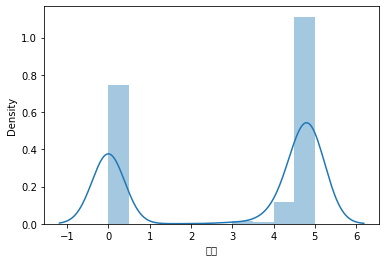

In [65]:
sns.distplot(df['평점'])

### (2) 조회수

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='조회수', ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from curre

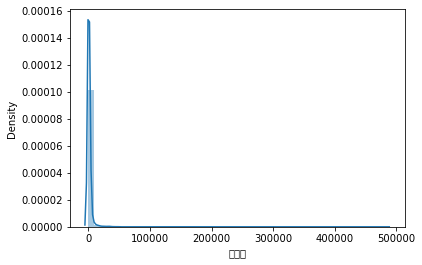

In [66]:
sns.distplot(df['조회수'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)


왜도: 1.367
첨도: 1.851


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


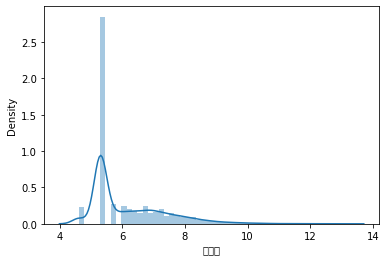

In [67]:
sns.distplot(np.log1p(df['조회수']))

print("왜도: {:.3f}".format(np.log1p(df['조회수']).skew())) 
print("첨도: {:.3f}".format(np.log1p(df['조회수']).kurt()))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

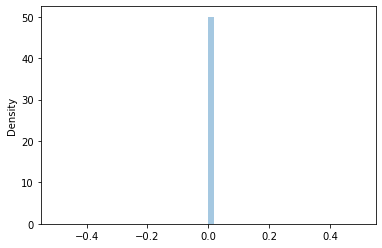

In [68]:
scaler = MinMaxScaler()
sns.distplot(scaler.fit_transform([df['조회수']]))

### (3) 누적판매수

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='누적판매수', ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45572 missing from c

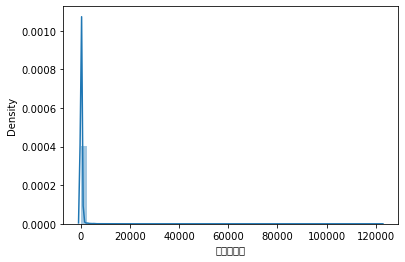

In [69]:
sns.distplot(df['누적판매수'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47588 missing f

왜도: 0.638
첨도: 5.511


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


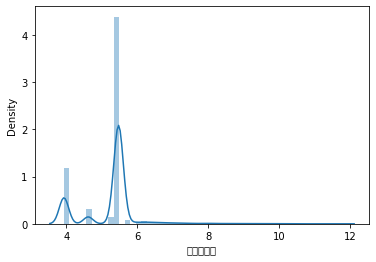

In [70]:
sns.distplot(np.log1p(df['누적판매수']))

print("왜도: {:.3f}".format(np.log1p(df['누적판매수']).skew())) 
print("첨도: {:.3f}".format(np.log1p(df['누적판매수']).kurt()))

### (4)좋아요

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='좋아요', ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50836 missing from curre

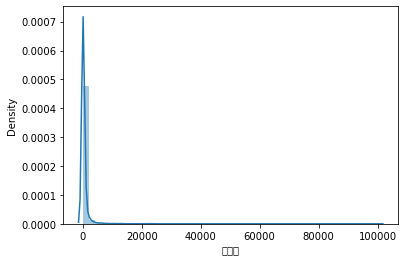

In [71]:
sns.distplot(df['좋아요'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)


왜도: 0.180
첨도: -0.197


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0, flags=flags)


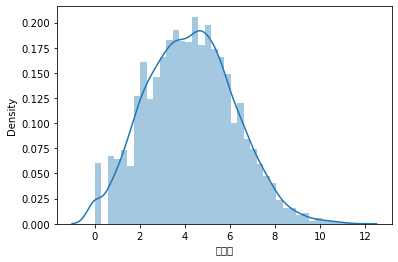

In [72]:
sns.distplot(np.log1p(df['좋아요']))

print("왜도: {:.3f}".format(np.log1p(df['좋아요']).skew())) 
print("첨도: {:.3f}".format(np.log1p(df['좋아요']).kurt()))

## 색상

In [73]:
df["색상"].value_counts()

검정색      488
아이보리     411
카키       385
베이지색     373
회색       356
        ... 
트로피컬       1
헤링본        1
패치워크       1
글렌 체크      1
깅엄 체크      1
Name: 색상, Length: 65, dtype: int64

### 평균인코딩

In [74]:
from category_encoders.target_encoder import TargetEncoder
encoder=TargetEncoder(smoothing=1)
df['색상2']=encoder.fit_transform(df['색상'],df['평점'])

In [75]:
df['색상'].value_counts()

검정색      488
아이보리     411
카키       385
베이지색     373
회색       356
        ... 
트로피컬       1
헤링본        1
패치워크       1
글렌 체크      1
깅엄 체크      1
Name: 색상, Length: 65, dtype: int64

In [77]:
df['색상2'].value_counts()

4.744877    488
3.554258    411
2.561818    385
2.809920    373
4.061798    356
           ... 
2.379258      4
0.353664      3
1.733580      3
2.589019      2
4.087689      2
Name: 색상2, Length: 61, dtype: int64

## 상품태그 정보

In [78]:
#부호를 제거해주는 함수
import re
def alpha_num(text):
    return re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9 ]', '', text)

In [79]:
df['상품태그정보']=df['상품태그정보'].apply(alpha_num)

In [80]:
df.head()

,하위카테고리,색상,상품명,상품고유번호,조회수,누적판매수,좋아요,평점,상품태그정보,가격,18세이하,19세이상 23세이하,24세이상 28세이하,29세이상 33세이하,34세이상 39세이하,40세이상,남성,여성,색상2
0,후드 집업,흰색,와핑 후드집업 크림 JJOT7203,836977,4400,1000,4018.0,4.7,집업 후드 후드집업 후드티,37900,0.46,0.20,0.08,0.04,0.03,0.19,0.15,0.85,2.529598
1,후드 집업,흰색,MIX HOOD JACKET,1599014,10000,500,2544.0,4.6,오버핏후드 자켓 집업 후드 집업후드,79000,0.31,0.20,0.20,0.12,0.07,0.10,0.57,0.43,2.529598
2,후드 집업,흰색,Classic Raglan Hoodie Zip Up [White Grey],1736613,2500,300,990.0,4.8,투웨이 나그랑 후드 집업 후드집업 이지웨어,53000,0.30,0.37,0.18,0.06,0.02,0.07,0.49,0.51,2.529598
3,후드 집업,흰색,하이 양기모 후드 집업 크림 HJHD2082,1188563,800,100,639.0,4.7,기모후드집업 양기모 양기모후드 집업 후드집업 기모,32900,0.44,0.27,0.11,0.02,0.03,0.13,0.24,0.76,2.529598
4,후드 집업,흰색,후디드 스웨트 집업 [화이트],1211720,1700,200,403.0,4.8,스웨트셋업 스웨트컬렉션 이지웨어 집업재킷 단독후디 한정후디 단독 무탠픽업 베이식,34900,0.32,0.34,0.13,0.05,0.03,0.13,0.43,0.57,2.529598


### 1. 카운트 기반 임베딩
TF- IDF : 단어의 특성 문서내 중요도 산출

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(max_features = 128) # max_features를 통해 최대 몇 개의 단어를 벡터로 바꿀 것인지 결정
v.fit(df['상품태그정보']) 

TfidfVectorizer(max_features=128)

In [82]:
print(v.vocabulary_) # 벡터화된 단어들 사전

{'집업': 96, '후드': 120, '후드집업': 122, '후드티': 123, '오버핏후드': 86, '자켓': 91, '집업후드': 97, '이지웨어': 90, '기모': 14, '스웨트컬렉션': 65, '단독후디': 30, '단독': 29, '무탠픽업': 47, '베이식': 50, '한정후드': 117, '후디': 125, '맨투맨': 44, '스웻': 66, '트레이닝': 107, '후드티셔츠': 124, '후리스': 127, '후디집업': 126, '크롭': 104, '캐주얼': 100, '로고': 38, '22신상품': 1, '셋업': 60, '니트집업': 25, '니트': 23, '기모후드': 15, '오버핏': 82, '가디건': 3, '후드자켓': 121, '트레이닝세트': 109, '트레이닝복': 108, '남녀공용': 20, '아우터': 69, '루즈핏': 41, '꾸안꾸': 19, '간절기아우터': 9, '점퍼': 93, '데일리룩': 33, '여성': 76, '오버사이즈': 81, '데일리': 31, '미니멀': 49, '블루종': 58, '간절기자켓': 10, '21컬렉션': 0, '플리스': 116, '환절기아우터': 119, '여름자켓': 75, '캐주얼아우터': 101, '출근룩': 98, '남자자켓': 22, '크롭가디건': 105, '여자가디건': 79, '데일리가디건': 32, '겨울니트': 11, '여성자켓': 78, '재킷': 92, '22컬렉션': 2, '가을자켓': 5, '울니트': 88, '겨울아우터': 12, '패딩': 112, '봄자켓': 54, '가죽자켓': 7, '라이더자켓': 35, '라이더': 34, '무스탕': 45, '무톤자켓': 48, '레더': 36, '레더자켓': 37, '비건레더': 59, '가죽': 6, '트위드자켓': 111, '양가죽': 70, '오버핏자켓': 85, '블레이저': 56, '에코레더': 71, '코트': 103, '캐주얼자켓': 102, '울자켓': 89, '싱글자켓':

In [83]:
x = v.transform(df['상품태그정보']).toarray()
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [84]:
print(x.shape) # 128개의 max 단어를 설정했기 때문에
print(df.shape)

(6700, 128)
(6700, 19)


In [85]:
x = pd.DataFrame(x)
temp = []
for i in range(len(x)):
  temp.append(list(x.iloc[i,:]))
df['preprocessed_text'] = temp

In [86]:
df.head()

,하위카테고리,색상,상품명,상품고유번호,조회수,누적판매수,좋아요,평점,상품태그정보,가격,18세이하,19세이상 23세이하,24세이상 28세이하,29세이상 33세이하,34세이상 39세이하,40세이상,남성,여성,색상2,preprocessed_text
0,후드 집업,흰색,와핑 후드집업 크림 JJOT7203,836977,4400,1000,4018.0,4.7,집업 후드 후드집업 후드티,37900,0.46,0.20,0.08,0.04,0.03,0.19,0.15,0.85,2.529598,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,후드 집업,흰색,MIX HOOD JACKET,1599014,10000,500,2544.0,4.6,오버핏후드 자켓 집업 후드 집업후드,79000,0.31,0.20,0.20,0.12,0.07,0.10,0.57,0.43,2.529598,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,후드 집업,흰색,Classic Raglan Hoodie Zip Up [White Grey],1736613,2500,300,990.0,4.8,투웨이 나그랑 후드 집업 후드집업 이지웨어,53000,0.30,0.37,0.18,0.06,0.02,0.07,0.49,0.51,2.529598,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,후드 집업,흰색,하이 양기모 후드 집업 크림 HJHD2082,1188563,800,100,639.0,4.7,기모후드집업 양기모 양기모후드 집업 후드집업 기모,32900,0.44,0.27,0.11,0.02,0.03,0.13,0.24,0.76,2.529598,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,후드 집업,흰색,후디드 스웨트 집업 [화이트],1211720,1700,200,403.0,4.8,스웨트셋업 스웨트컬렉션 이지웨어 집업재킷 단독후디 한정후디 단독 무탠픽업 베이식,34900,0.32,0.34,0.13,0.05,0.03,0.13,0.43,0.57,2.529598,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [87]:
df.iloc[1,18]

2.5295977011494237

# 최종 저장하기

In [88]:
df.to_csv("", index= False)